In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Filtering for Pakistan Data Analyst Roles

In [2]:
df_DA_PK = df[(df['job_country']=='Pakistan')&(df['job_title']=='Data Analyst')].copy()

df_DA_PK['job_posted_month_no']= df_DA_PK['job_posted_date'].dt.month

df_DA_PK_explode = df_DA_PK.explode('job_skills')

In [5]:
# Count of each Skill in Job postings by month

df_DA_PK_pivot = df_DA_PK_explode.pivot_table(index='job_posted_month_no', columns= 'job_skills', aggfunc='size', fill_value=0)

df_DA_PK_pivot

job_skills,airflow,aws,azure,bigquery,c++,databricks,digitalocean,excel,flow,gdpr,...,splunk,spreadsheet,spss,sql,sql server,ssis,tableau,vba,windows,word
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,2,0,0,2,1,0,0,2,0,0,...,0,0,1,7,0,0,5,2,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,3,0,0,0,2,0,0
3,1,0,0,1,1,0,0,7,0,3,...,0,0,3,3,0,0,2,0,0,0
4,0,1,0,0,0,0,0,3,0,0,...,1,0,0,4,0,0,1,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
6,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
8,1,1,1,0,0,0,1,2,0,0,...,0,0,0,2,1,0,2,0,1,0
9,0,0,0,0,0,0,0,6,0,0,...,0,1,1,5,0,0,4,0,0,3


In [6]:
# sorting the skills from highest to lowest count from left to right

df_DA_PK_pivot.loc['Total']= df_DA_PK_pivot.sum()

df_DA_PK_pivot = df_DA_PK_pivot[df_DA_PK_pivot.loc['Total'].sort_values(ascending = False ).index]

df_DA_PK_pivot = df_DA_PK_pivot.drop('Total')

df_DA_PK_pivot

job_skills,sql,excel,python,tableau,r,power bi,go,powerpoint,sas,sheets,...,databricks,numpy,oracle,php,matlab,shell,spreadsheet,splunk,ssis,windows
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,7,2,5,5,3,0,3,1,2,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,7,2,2,1,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,3,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,2,2,1,2,0,2,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
9,5,6,6,4,4,3,2,1,2,2,...,0,0,0,0,0,0,1,0,0,0


## Trending Top Skills for Data Analysts in the Pakistan

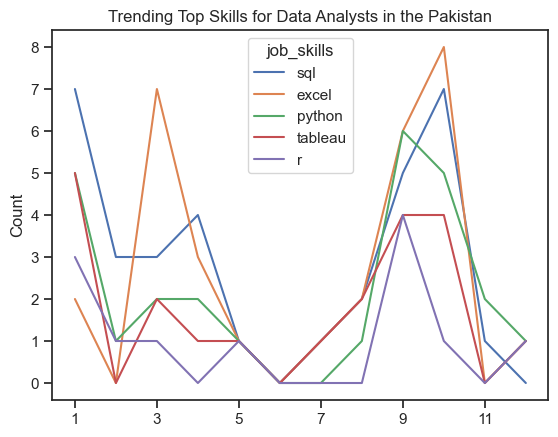

In [13]:
df_DA_PK_pivot.iloc[:,:5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the Pakistan')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [8]:
# Counts of jobs posted by month

DA_Totals = df_DA_PK.groupby('job_posted_month_no').size()

DA_Totals

job_posted_month_no
1     12
2      3
3     12
4      9
5      4
6      3
7      5
8      6
9     12
10    12
11     5
12     2
dtype: int64

In [9]:
# Calculating the percentage of skills in job postings by month

df_DA_PK_percent = df_DA_PK_pivot.div(DA_Totals/100, axis= 0)

df_DA_PK_percent

job_skills,sql,excel,python,tableau,r,power bi,go,powerpoint,sas,sheets,...,databricks,numpy,oracle,php,matlab,shell,spreadsheet,splunk,ssis,windows
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,58.333333,16.666667,41.666667,41.666667,25.000000,0.000000,25.000000,8.333333,16.666667,8.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100.000000,0.000000,33.333333,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,25.000000,58.333333,16.666667,16.666667,8.333333,0.000000,0.000000,16.666667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,44.444444,33.333333,22.222222,11.111111,0.000000,0.000000,11.111111,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.111111,0.000000,0.000000
5,25.000000,25.000000,25.000000,25.000000,25.000000,0.000000,25.000000,25.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,20.000000,20.000000,0.000000,20.000000,0.000000,0.000000,20.000000,20.000000,0.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,33.333333,33.333333,16.666667,33.333333,0.000000,33.333333,0.000000,16.666667,0.000000,16.666667,...,0.000000,0.000000,0.000000,16.666667,0.000000,0.000000,0.000000,0.000000,0.000000,16.666667
9,41.666667,50.000000,50.000000,33.333333,33.333333,25.000000,16.666667,8.333333,16.666667,16.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.333333,0.000000,0.000000,0.000000


In [10]:
# Converting month number column to month name

df_DA_PK_percent = df_DA_PK_percent.reset_index()

df_DA_PK_percent['job_posted_month'] = df_DA_PK_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%b'))

df_DA_PK_percent = df_DA_PK_percent.set_index('job_posted_month')

df_DA_PK_percent = df_DA_PK_percent.drop(columns='job_posted_month_no')

df_DA_PK_percent

job_skills,sql,excel,python,tableau,r,power bi,go,powerpoint,sas,sheets,...,databricks,numpy,oracle,php,matlab,shell,spreadsheet,splunk,ssis,windows
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,58.333333,16.666667,41.666667,41.666667,25.000000,0.000000,25.000000,8.333333,16.666667,8.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,100.000000,0.000000,33.333333,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,25.000000,58.333333,16.666667,16.666667,8.333333,0.000000,0.000000,16.666667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,44.444444,33.333333,22.222222,11.111111,0.000000,0.000000,11.111111,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.111111,0.000000,0.000000
May,25.000000,25.000000,25.000000,25.000000,25.000000,0.000000,25.000000,25.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,20.000000,20.000000,0.000000,20.000000,0.000000,0.000000,20.000000,20.000000,0.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,33.333333,33.333333,16.666667,33.333333,0.000000,33.333333,0.000000,16.666667,0.000000,16.666667,...,0.000000,0.000000,0.000000,16.666667,0.000000,0.000000,0.000000,0.000000,0.000000,16.666667
Sep,41.666667,50.000000,50.000000,33.333333,33.333333,25.000000,16.666667,8.333333,16.666667,16.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.333333,0.000000,0.000000,0.000000


## Tranding Top Skills for Data Analyst in the Pakistan

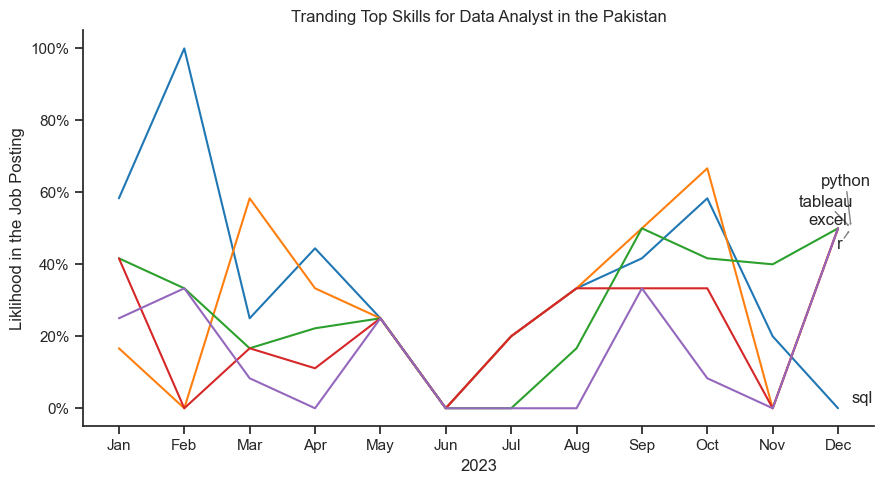

In [31]:
df_plot = df_DA_PK_percent.iloc[:,:5]

fig, ax = plt.subplots(figsize=(9, 5))

sns.set_theme(style='ticks')
sns.lineplot(data=df_plot, dashes=False, palette='tab10',ax=ax)
sns.despine()

# for i, col in enumerate(df_plot.columns):
#     ax.plot(df_plot.index, df_plot[col], label=col, linestyle='--', marker='o')

plt.title('Tranding Top Skills for Data Analyst in the Pakistan')
plt.xlabel('2023')
plt.ylabel('Liklihood in the Job Posting')
plt.legend().remove()

from adjustText import adjust_text

texts = []
for i in range(5):
    texts.append(plt.text(11.2,df_plot.iloc[-1,i],df_plot.columns[i]))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

from matplotlib.ticker import PercentFormatter

ax= plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()